# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/Econ441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1.) US perm Visas csv from cycle using zip extractor


In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [5]:
# display column names with a for loop
for col in df.columns:
    print(col)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [6]:
df["decision_date"] = pd.to_datetime(df.decision_date)
df["d_month"] = df.decision_date.dt.month
df["d_date"] = df.decision_date.dt.day

In [7]:
dta = df[["case_status", "class_of_admission", "wage_offer_from_9089", "d_month", "d_date"]].copy()

# 3.) Clean your data for a decision tree


In [8]:
dta.dropna(inplace = True)

In [9]:
dta.class_of_admission.unique()

array(['J-1', 'B-2', 'H-1B', 'L-1', 'EWI', 'E-2', 'E-1', 'H-2B', 'TPS',
       'F-1', 'B-1', 'C-1', 'Not in USA', 'TN', 'H-4', 'O-1', 'R-1',
       'L-2', 'Q', 'F-2', 'H-1B1', 'Parolee', 'G-5', 'E-3', 'H-2A', 'VWT',
       'P-1', 'A1/A2', 'D-1', 'A-3', 'R-2', 'H-1C', 'H-3', 'J-2', 'P-4',
       'I', 'H-1A', 'G-1', 'VWB', 'G-4', 'P-3', 'AOS/H-1B', 'O-3',
       'Parol', 'M-1', 'N', 'TD', 'C-3', 'O-2', 'K-1', 'V-2', 'T-1',
       'M-2', 'P-2'], dtype=object)

In [10]:
dta.wage_offer_from_9089.unique()

array([75629.0, 37024.0, 47923.0, ..., '65,610.00', '109,845.00',
       '142,938.00'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder
le = LabelEncoder()

# fit and transform the string column
dta['class_of_admission'] = le.fit_transform(dta['class_of_admission'])

dta['wage_offer_from_9089'] = dta['wage_offer_from_9089'].astype(str)
dta['wage_offer_from_9089'] = pd.to_numeric(dta['wage_offer_from_9089'].str.replace(',', ''), errors='coerce')
dta.dropna(subset=['wage_offer_from_9089'], inplace=True)
dta['wage_offer_from_9089'] = dta['wage_offer_from_9089'].astype(float)

In [12]:
dta.head()

,case_status,class_of_admission,wage_offer_from_9089,d_month,d_date
0,Certified,26,75629.00,2,1
1,Denied,4,37024.00,12,21
2,Certified,18,47923.00,12,1
3,Certified,4,10.97,12,1
4,Certified,29,100000.00,1,26


# 4.) Fit and plot a decision tree of depth 3


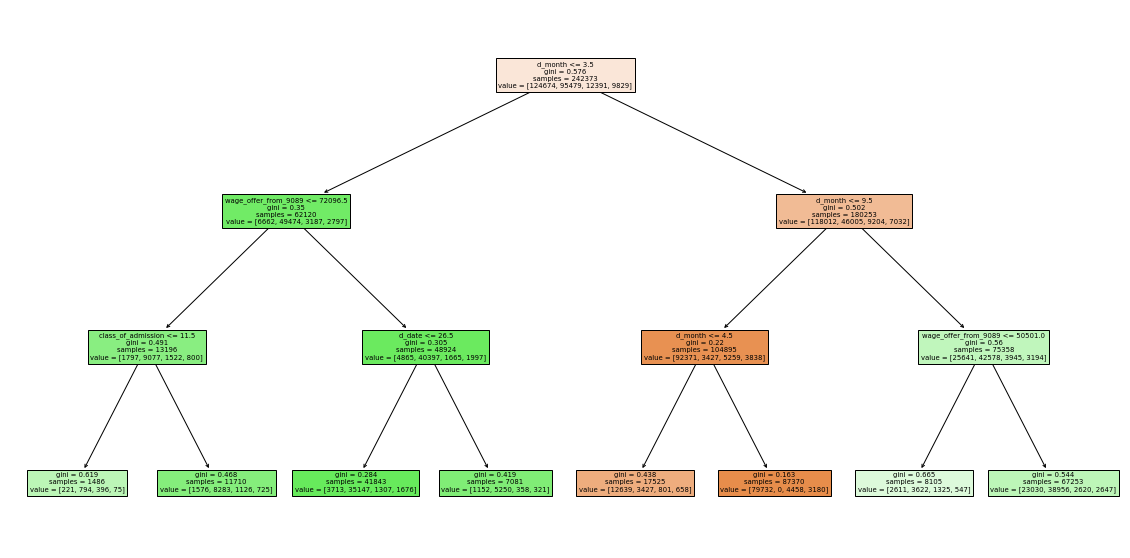

In [13]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

# split the dataset into features and target
X = dta.drop('case_status', axis=1)
y = dta['case_status']

# fit a decision tree classifier of depth 3
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

In [14]:
X.iloc[:, 2]

0          2
1         12
2         12
3         12
4          1
          ..
374356    12
374358    12
374359    12
374360    12
374361    12
Name: d_month, Length: 242373, dtype: int64

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node is that decision date in $d_{month} \in \{May,\,June,\,Juily,\,August,\,September\}$. ($4.5<d_{month}<=9.5$)

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [15]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the dataset into features and target
X = dta.drop('case_status', axis=1)
y = dta['case_status']

# Use a for loop to iterate over a range of possible max_depth values
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
out_of_sample_accuracies = []
for max_depth in max_depths:
    # Use train_test_split to split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Fit a decision tree model with the current max_depth value
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    # Use the model to predict the target values for the test set
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy of the model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    out_of_sample_accuracies.append(accuracy)

# Find the max_depth that results in the highest out-of-sample accuracy
best_max_depth = max_depths[np.argmax(out_of_sample_accuracies)]
print(best_max_depth)

10


In [16]:
print(out_of_sample_accuracies)

[0.6922743682310469, 0.7618566271273852, 0.760371325425477, 0.7726044352759154, 0.7766271273852501, 0.7793708096957195, 0.7844249613202682, 0.7865703971119133, 0.7918720990201135, 0.8022279525528623]


In [17]:
max(out_of_sample_accuracies)

0.8022279525528623

So the best depth is 10, and the best out of sample accuracies is around 80.22%.